In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv("C:/Users/hp5cd/Downloads/Mall_Customers.csv")
print("First 5 rows of dataset:")
print(df.head())

First 5 rows of dataset:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [4]:
df_selected = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [5]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_selected)

In [6]:
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

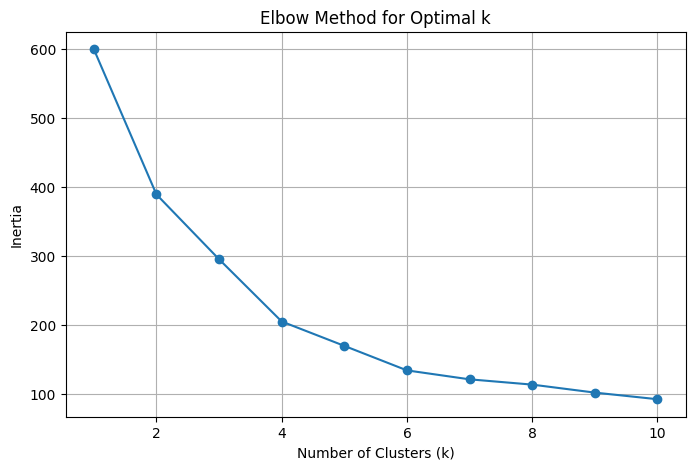

In [7]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

In [8]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(scaled_data)
df['Cluster'] = labels

In [9]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

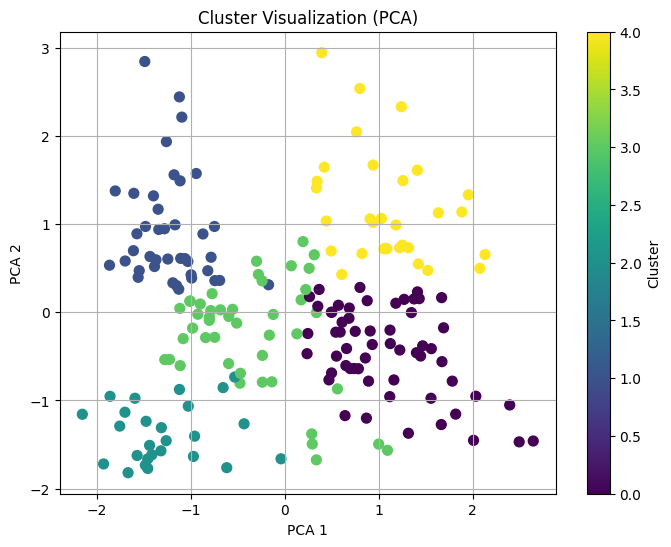

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, cmap='viridis', s=50)
plt.title("Cluster Visualization (PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()

In [11]:
sil_score = silhouette_score(scaled_data, labels)
print("Silhouette Score:", sil_score)

Silhouette Score: 0.40846873777345605
